## 1. Install AGAT environment with `Conda`.
```
conda init
conda env create -f agat_linux_gpu_cu124.yml
```

## 2. Build database
#### 2.1. Collect `OUTCAR` paths
```
find . -name OUTCAR > paths.log
sed -i 's/OUTCAR$//g' paths.log
sed -i "s#^.#${PWD}#g" paths.log
```

In [1]:
import os
os.system('find . -name OUTCAR > paths.log')
os.system('sed -i "s/OUTCAR$//g" paths.log')
os.system('sed -i "s#^.#${PWD}#g" paths.log')
_ = os.system('ls')

AGAT_test.ipynb
DFT_data
learning_another_example.txt
paths.log


In [2]:
_ = os.system('head paths.log')

/public/home/sps-xia/jzhang/test/AGAT_test/DFT_data/Ni12Co19Fe14Pd37Pt14/surface_static/
/public/home/sps-xia/jzhang/test/AGAT_test/DFT_data/Ni12Co19Fe14Pd37Pt14/adsorption_static/34/
/public/home/sps-xia/jzhang/test/AGAT_test/DFT_data/Ni12Co19Fe14Pd37Pt14/bulk_static/
/public/home/sps-xia/jzhang/test/AGAT_test/DFT_data/Ni12Co17Fe18Pd31Pt18/bulk_static/
/public/home/sps-xia/jzhang/test/AGAT_test/DFT_data/Ni12Co17Fe18Pd31Pt18/surface_static/
/public/home/sps-xia/jzhang/test/AGAT_test/DFT_data/Ni12Co17Fe18Pd31Pt18/adsorption_static/41/
/public/home/sps-xia/jzhang/test/AGAT_test/DFT_data/Ni12Co17Fe18Pd30Pt19/adsorption_static/27/
/public/home/sps-xia/jzhang/test/AGAT_test/DFT_data/Ni12Co17Fe18Pd30Pt19/bulk_static/
/public/home/sps-xia/jzhang/test/AGAT_test/DFT_data/Ni12Co17Fe18Pd30Pt19/surface_static/
/public/home/sps-xia/jzhang/test/AGAT_test/DFT_data/Ni12Co17Fe17Pd32Pt18/bulk_static/


#### 2.2. Build database (DGL binary graphs)

In [3]:
from agat.data import BuildDatabase
if __name__ == '__main__':
    database = BuildDatabase(mode_of_NN='ase_dist', num_of_cores=16)
    database.build()

Mask similar frames: FalseMask similar frames:  Mask reversed magnetic moments:False  False
Mask reversed magnetic moments: Mask similar frames:FalseMask similar frames: 
 FalseFalse  Mask reversed magnetic moments: Mask reversed magnetic moments:False 
False
Mask similar frames: False Mask reversed magnetic moments: False
Mask similar frames:Mask similar frames:  FalseFalse  Mask reversed magnetic moments:Mask similar frames:Mask reversed magnetic moments: False 
False
Mask similar frames: False Mask reversed magnetic moments: False
Mask similar frames: False Mask reversed magnetic moments: False
Mask similar frames: 

Extracting 0 VASP files.:   0%|                                                    | 0/8 [00:00<?, ?it/s]

 False Mask reversed magnetic moments: False
False Mask reversed magnetic moments: False
Mask similar frames: False Mask reversed magnetic moments:Mask similar frames:  FalseFalse
 Mask reversed magnetic moments: False
Mask similar frames: False Mask reversed magnetic moments: False
Mask similar frames: False Mask reversed magnetic moments: False
Mask similar frames: False Mask reversed magnetic moments: False


Extracting 0 VASP files.:  12%|█████▌                                      | 1/8 [00:00<00:03,  2.29it/s]

[<Process name='Process-1' pid=3363131 parent=3363022 started>, <Process name='Process-2' pid=3363132 parent=3363022 started>, <Process name='Process-3' pid=3363135 parent=3363022 started>, <Process name='Process-4' pid=3363148 parent=3363022 started>, <Process name='Process-5' pid=3363165 parent=3363022 started>, <Process name='Process-6' pid=3363194 parent=3363022 started>, <Process name='Process-7' pid=3363203 parent=3363022 started>, <Process name='Process-8' pid=3363216 parent=3363022 started>, <Process name='Process-9' pid=3363219 parent=3363022 started>, <Process name='Process-10' pid=3363224 parent=3363022 started>, <Process name='Process-11' pid=3363241 parent=3363022 started>, <Process name='Process-12' pid=3363333 parent=3363022 started>, <Process name='Process-13' pid=3363334 parent=3363022 started>, <Process name='Process-14' pid=3363335 parent=3363022 started>, <Process name='Process-15' pid=3363338 parent=3363022 started>, <Process name='Process-16' pid=3363349 parent=33

Extracting 0 VASP files.: 100%|████████████████████████████████████████████| 8/8 [00:05<00:00,  1.37it/s]


Waiting for all subprocesses...


Reading 0 batch graphs:   0%|                                                    | 0/173 [00:00<?, ?it/s]

[<Process name='Process-17' pid=3363511 parent=3363022 started>, <Process name='Process-18' pid=3363512 parent=3363022 started>, <Process name='Process-19' pid=3363514 parent=3363022 started>, <Process name='Process-20' pid=3363517 parent=3363022 started>, <Process name='Process-21' pid=3363520 parent=3363022 started>, <Process name='Process-22' pid=3363522 parent=3363022 started>, <Process name='Process-23' pid=3363523 parent=3363022 started>, <Process name='Process-24' pid=3363525 parent=3363022 started>, <Process name='Process-25' pid=3363526 parent=3363022 started>, <Process name='Process-26' pid=3363527 parent=3363022 started>, <Process name='Process-27' pid=3363529 parent=3363022 started>, <Process name='Process-28' pid=3363531 parent=3363022 started>, <Process name='Process-29' pid=3363534 parent=3363022 started>, <Process name='Process-30' pid=3363536 parent=3363022 started>, <Process name='Process-31' pid=3363537 parent=3363022 started>, <Process name='Process-32' pid=3363538 

Reading 6 batch graphs: 100%|██████████████████████████████████████████| 173/173 [01:21<00:00,  2.11it/s]

Reading 7 batch graphs: 100%|██████████████████████████████████████████| 173/173 [01:22<00:00,  2.10it/s]


All subprocesses done.


## 3. Train AGAT model

In [4]:
from agat.model import Fit
f = Fit(epochs=2, device='cpu')
f.fit()

/public/home/sps-xia/jzhang/.conda/envs/agat/lib/python3.11/site-packages/agat/lib/model_lib.py:91: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint_dict = torch.loa

tensor(49.1090)

In [5]:
_ = os.system('ls')

agat_model
AGAT_test.ipynb
dataset
DFT_data
fit.log
learning_another_example.txt
out_file
paths.log


In [6]:
_ = os.system('head -100 fit.log')

User info: Specified device for potential model: cpu
User info: Loading dataset from dataset/all_graphs.bin
User info: Checkpoint not detected
PotentialModel(
  (gat_layers): ModuleList(
    (0): Layer(
      (layer): Linear(in_features=118, out_features=300, bias=True)
      (leaky_relu1): LeakyReLU(negative_slope=0.2)
      (leaky_relu2): LeakyReLU(negative_slope=0.2)
    )
    (1-2): 2 x Layer(
      (layer): Linear(in_features=300, out_features=300, bias=True)
      (leaky_relu1): LeakyReLU(negative_slope=0.2)
      (leaky_relu2): LeakyReLU(negative_slope=0.2)
    )
  )
  (energy_readout_layers): ModuleList(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=50, out_features=30, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=30, out_features=10, bias=True)
    (7): Linear(in_f

In [7]:
_ = os.system("grep Validation fit.log | awk '{print $1,$6,$7}' > learning.txt ")

In [8]:
_ = os.system("head learning.txt ")

Epoch Energy_MAE Force_MAE
00000 6.56529856 0.33269960
00001 6.52621269 0.26171291


## 4. Plot training results
For the convenience of display, results of another training is copied here. `learning_another_example.txt`

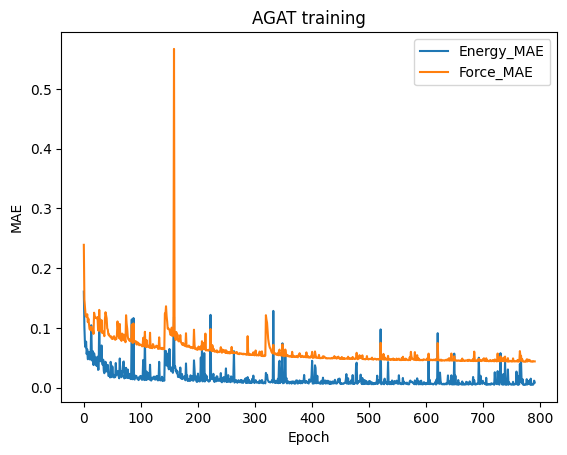

In [9]:
from matplotlib import pyplot as plt
import numpy as np
with open('learning_another_example.txt', 'r') as f:
    Legend_list = f.readline().split()
    data = np.loadtxt(f)
    plt.title('AGAT training')
    plt.xlabel(Legend_list[0])
    plt.ylabel('MAE')
    plt.plot(data[:,0], data[:,1], label=Legend_list[1])
    plt.plot(data[:,0], data[:,2], label=Legend_list[2])
    plt.legend()
    plt.show()

## 5. Application (geometry optimization)

In [10]:
from ase.optimize import BFGS
from agat.app import AgatCalculator
from ase.io import read
from ase import Atoms

model_save_dir = 'agat_model'
graph_build_scheme_dir = 'dataset'

atoms = read(os.path.join(os.path.abspath('DFT_data/Ni11Co13Fe16Pd16Pt40/adsorption_static/7'), 'POSCAR'))
calculator=AgatCalculator(model_save_dir,
                          graph_build_scheme_dir, device='cpu')
atoms = Atoms(atoms, calculator=calculator)
dyn = BFGS(atoms, trajectory='test.traj')
r = dyn.run(fmax=0.05, steps=20)
print('Return code:', r)

/public/home/sps-xia/jzhang/.conda/envs/agat/lib/python3.11/site-packages/agat/lib/model_lib.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model = torch.load(os.p

      Step     Time          Energy          fmax
BFGS:    0 22:05:09      -22.748135        1.117552
BFGS:    1 22:05:09      -22.748828        1.228198
BFGS:    2 22:05:09      -22.749020        1.872037
BFGS:    3 22:05:09      -22.761244        1.882542
BFGS:    4 22:05:09      -22.772836        2.031889
BFGS:    5 22:05:09      -22.813318        2.517716
BFGS:    6 22:05:10      -22.827746        2.735729
BFGS:    7 22:05:10      -22.839774        2.845866
BFGS:    8 22:05:10      -22.880297        2.652244
BFGS:    9 22:05:10      -22.889125        2.645041
BFGS:   10 22:05:10      -22.894421        2.908069
BFGS:   11 22:05:11      -22.903890        2.738654
BFGS:   12 22:05:11      -22.904767        3.360549
BFGS:   13 22:05:11      -22.897854        4.001674
BFGS:   14 22:05:11      -22.904503        3.389318
BFGS:   15 22:05:11      -22.913556        3.292893
BFGS:   16 22:05:12      -22.914355        3.379643
BFGS:   17 22:05:12      -22.907768        3.889651
BFGS:   18 22:

In [11]:
from ase.visualize import view
view(atoms)

<Popen: returncode: None args: ['/public/home/sps-xia/jzhang/.conda/envs/aga...>

In [12]:
_ = os.system("ag test.traj")